In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-basics-first)

Let's use `solve_ivp` from `scipy.integrate` to define and solve an initial-value problem for $u'=\sin[(u+t)^2]$ over $t \in [0,4]$, such that $u(0)=-1$.

To create an initial-value problem for $u(t)$, you must supply a function that computes $u'$, an initial value for $u$, and the endpoints of the interval for $t$. The $t$ interval should be defined as `(a,b)`, where at least one of the values is a float.

```{index} ! Julia; ODEProblem, ! Julia; solve
```

In [2]:
f = lambda t, u: sin((t + u) ** 2)
tspan = [0.0, 4.0]
u0 = [-1.0]

Note above that even though this is a problem for a scalar function $u(t)$, we had to set the initial condition as a "one-dimensional vector."

In [3]:
from scipy.integrate import solve_ivp
sol = solve_ivp(f, tspan, u0)

The resulting solution object has fields `t` and `y` that contain the values of the independent and dependent variables, respectively; those field names are the same regardless of what we use in our own codes.

t shape: (10,)
u shape: (1, 10)


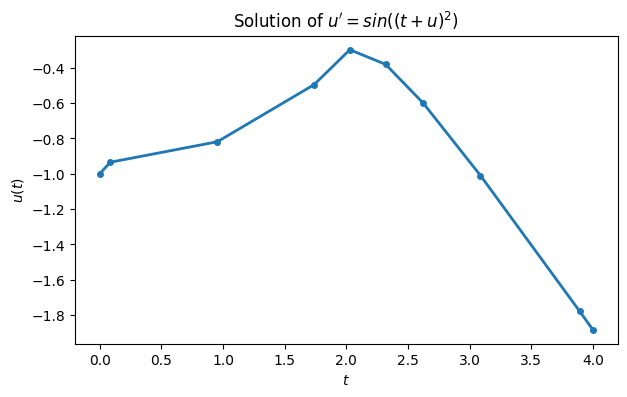

In [4]:
print("t shape:", sol.t.shape)
print("u shape:", sol.y.shape)
plot(sol.t, sol.y[0, :], "-o")
xlabel("$t$"), ylabel("$u(t)$")
title(("Solution of $u' = sin((t+u)^2)$"));

You can see above that the solution was not computed at enough points to make a smooth graph. There is a way to request output at times of your choosing.

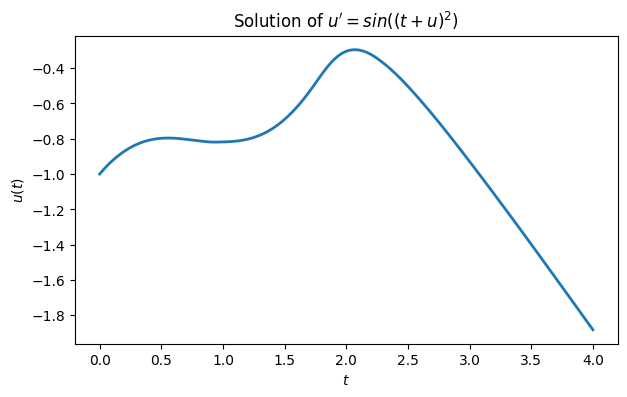

In [5]:
sol = solve_ivp(f, tspan, u0, t_eval=linspace(0, 4, 200))
plot(sol.t, sol.y[0, :], "-")
xlabel("$t$"), ylabel("$u(t)$")
title(("Solution of $u' = sin((t+u)^2)$"));

Another option is to enable interpolation to evaluate the solution anywhere after the fact:

In [6]:
sol = solve_ivp(f, tspan, u0, dense_output=True)
for t in linspace(0, 4, 6):
    print(f"u({t:.2f}) = {sol.sol(t)[0]:.4f}")

u(0.00) = -1.0000
u(0.80) = -0.8122
u(1.60) = -0.6204
u(2.40) = -0.4320
u(3.20) = -1.1139
u(4.00) = -1.8822
